# Using ResNet50 for Image classification

# **Importing Libraries**

In [1]:
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow.keras.layers import Input, Flatten, Dense, Dropout, Conv2D, MaxPooling2D
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.models import Sequential
from keras.applications import ResNet50
%matplotlib inline
import os
from PIL import Image
from tensorflow.keras.utils import plot_model
import warnings

warnings.filterwarnings("ignore")

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

#  **Add Path of Dataset**

In [2]:
folder_path = '../input/animal-image-datasetdog-cat-and-panda/animals/animals/'

print('Total cats images:', len(os.listdir(folder_path + 'cats')))
print('Total dogs images:', len(os.listdir(folder_path + 'dogs')))
print('Total pandas images:', len(os.listdir(folder_path + 'panda')))


Total cats images: 1000
Total dogs images: 1000
Total pandas images: 1000


# Pre-processing of Dataset

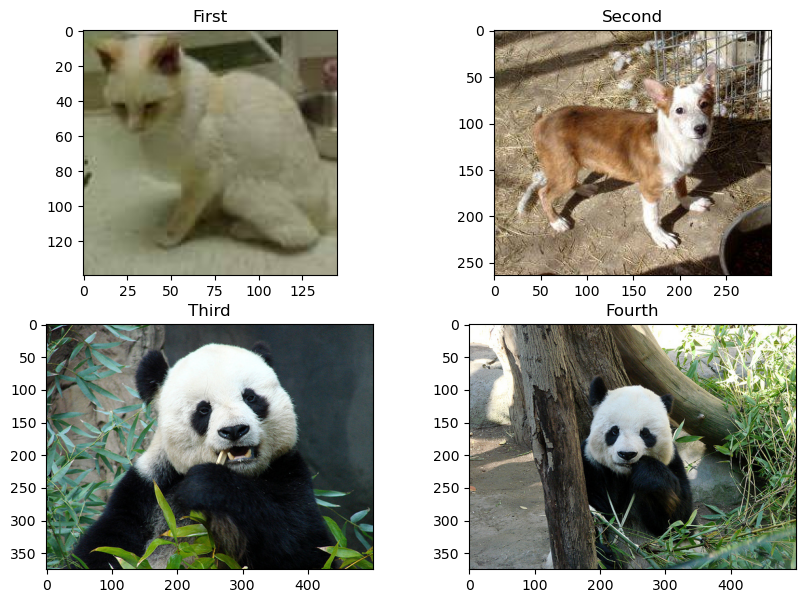

In [3]:

fig = plt.figure(figsize=(10, 7))
rows = 2
columns = 2

Image1 = Image.open(folder_path + 'cats/cats_00011.jpg')
Image2 = Image.open(folder_path + 'dogs/dogs_00011.jpg')
Image3 = Image.open(folder_path + 'panda/panda_00101.jpg')
Image4 = Image.open(folder_path + 'panda/panda_00203.jpg')

fig.add_subplot(rows, columns, 1)
plt.imshow(Image1)
plt.title("First")

fig.add_subplot(rows, columns, 2)
plt.imshow(Image2)
plt.title("Second")

fig.add_subplot(rows, columns, 3)
plt.imshow(Image3)
plt.title("Third")

fig.add_subplot(rows, columns, 4)
plt.imshow(Image4)
plt.title("Fourth")

plt.show()


In [4]:

train_datagen = ImageDataGenerator(
    fill_mode='nearest',
    validation_split=0.1
)

# Train, validation, and test splits
train_generator = train_datagen.flow_from_directory(
    folder_path,
    target_size=(108, 108),
    color_mode='rgb',
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    folder_path,
    target_size=(108, 108),
    color_mode='rgb',
    class_mode='categorical',
    subset='validation'
)

test_generator = train_datagen.flow_from_directory(
    folder_path,
    target_size=(108, 108),
    color_mode='rgb',
    class_mode='categorical',
    subset='validation'
)


Found 2700 images belonging to 3 classes.
Found 300 images belonging to 3 classes.
Found 300 images belonging to 3 classes.


In [5]:

model = tf.keras.models.Sequential([
    ResNet50(input_shape=(108, 108, 3), include_top=False),
])
for layer in model.layers:
    layer.trainable = False

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(3, activation='softmax'))

model.summary()

94765736/94765736 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 4, 4, 2048)        23587712  
                                                                 
 conv2d (Conv2D)             (None, 2, 2, 64)          1179712   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 1, 1, 64)         0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dropout (Dropout)           (None, 64)                0 

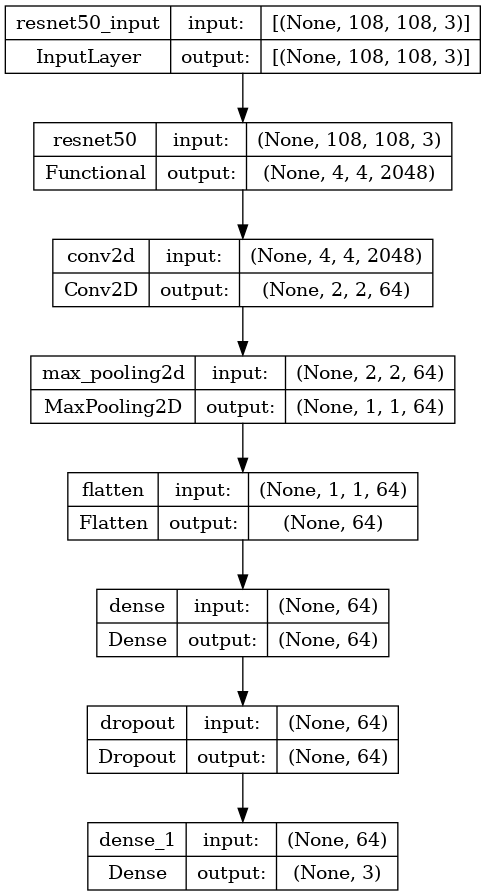

In [6]:
# Visualize the model
plot_model(model, to_file='model_visualization.png', show_shapes=True, show_layer_names=True)

In [7]:
model.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [8]:
%%time
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=25,
    verbose=1
)

Epoch 1/25
85/85 [==============================] - 29s 211ms/step - loss: 1.2890 - accuracy: 0.7837 - val_loss: 0.4258 - val_accuracy: 0.8700
Epoch 2/25
85/85 [==============================] - 8s 95ms/step - loss: 0.4873 - accuracy: 0.8859 - val_loss: 0.6129 - val_accuracy: 0.8367
Epoch 3/25
85/85 [==============================] - 8s 98ms/step - loss: 0.2945 - accuracy: 0.9096 - val_loss: 0.3036 - val_accuracy: 0.9067
Epoch 4/25
85/85 [==============================] - 8s 92ms/step - loss: 0.2009 - accuracy: 0.9319 - val_loss: 0.3525 - val_accuracy: 0.9033
Epoch 5/25
85/85 [==============================] - 8s 92ms/step - loss: 0.1011 - accuracy: 0.9644 - val_loss: 0.2981 - val_accuracy: 0.9200
Epoch 6/25
85/85 [==============================] - 8s 92ms/step - loss: 0.0943 - accuracy: 0.9711 - val_loss: 0.3444 - val_accuracy: 0.9033
Epoch 7/25
85/85 [==============================] - 8s 97ms/step - loss: 0.0770 - accuracy: 0.9763 - val_loss: 0.4201 - val_accuracy: 0.9033
Epoch 8/25


In [9]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

10/10 [==============================] - 1s 75ms/step - loss: 0.8136 - accuracy: 0.9033
Test Loss: 0.813596785068512
Test Accuracy: 0.903333306312561


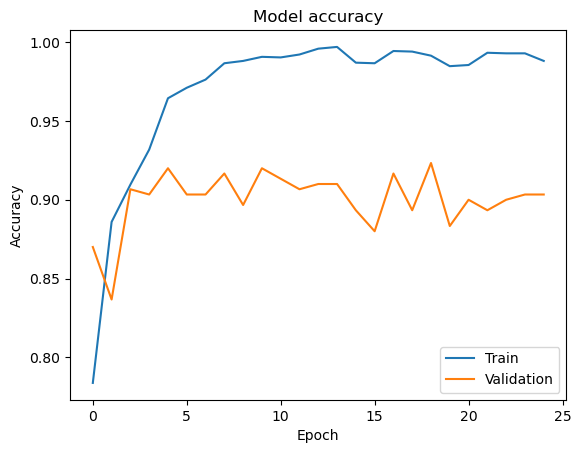

In [10]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

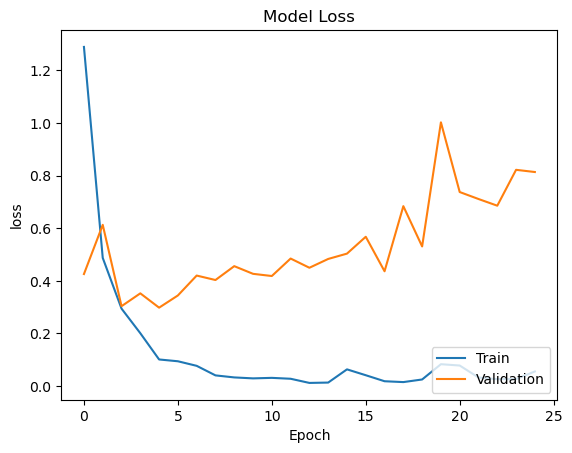

In [11]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()